#### **Dicionário dos Dados**

**COLUNAS:**

- **Cliente:** Nome do cliente;
- **Sexo:** Gênero do cliente;
- **Idade:** Idade do cliente;
- **Gastos_Loja:** A quantia total gasta pelo cliente na loja (em R$);
- **Comprou_Produto:** Se o cliente comprou ou não o produto (0 = Não | 1 = Sim).

In [155]:
# Importar bibliotecas de apoio
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [156]:
# Configurações para melhor visualização dos dados
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

plt.rcParams['figure.figsize'] = 11, 6
sns.set(rc={'figure.figsize':(11, 6)})

%matplotlib inline

In [157]:
# Carregar banco de dados original
original_df = pd.read_csv('previsao_compra_produto.csv')

In [158]:
# Criar uma cópia da tabela original
df = original_df.copy()

In [159]:
# Visualizar as primeiras linhas da tabela
df.head()

,Cliente,Sexo,Idade,Gastos_Loja,Comprou_Produto
0,Srta. Clarice Souza,Mulher,47,5100.00,1
1,Enzo Pires,Homem,27,8800.00,0
2,Sra. Rafaela Farias,Mulher,41,7100.00,0
3,Ana Laura Fernandes,Mulher,59,7600.00,1
4,Nina Pereira,Mulher,57,12200.00,1


In [160]:
# Checar dimensões da tabela
print(f'Número de colunas:  {df.shape[1]}')
print(f'Número de linhas:   {df.shape[0]}')
print(f'Número de amostras: {df.size}')

Número de colunas:  5
Número de linhas:   400
Número de amostras: 2000


In [161]:
# Confirmar que não há valores vazios
print(f'Possui valores vazios:   {df.isna().sum().any()}')
print(f'Total de valores vazios: {df.isna().sum().sum()}') 

Possui valores vazios:   False
Total de valores vazios: 0


In [162]:
# Criar função para estatísticas básicas em português
def estatisticas(df=df):
    """Função para estatísticas básicas da tabela"""
    # Coletar estatísticas em siglas inglês
    stats = df.describe()
    
    # Traduzir estatísticas para literal português
    indices = ['Contagem', 'Média Aritmética', 'Desvio Padrão', 
               'Valor Mínimo', '25% - 1° quartil', '50% - 2° quartil', 
               '75% - 3° quartil', 'Valor Máximo']
    
    # Renomear os índices com as traduções
    stats.index = indices
    
    # Visualizar estatísticas
    display(stats)
    
estatisticas(df)

,Idade,Gastos_Loja,Comprou_Produto
Contagem,400.00,400.00,400.00
Média Aritmética,37.66,6974.25,0.36
Desvio Padrão,10.48,3409.70,0.48
Valor Mínimo,18.00,1500.00,0.00
25% - 1° quartil,29.75,4300.00,0.00
50% - 2° quartil,37.00,7000.00,0.00
75% - 3° quartil,46.00,8800.00,1.00
Valor Máximo,60.00,15000.00,1.00


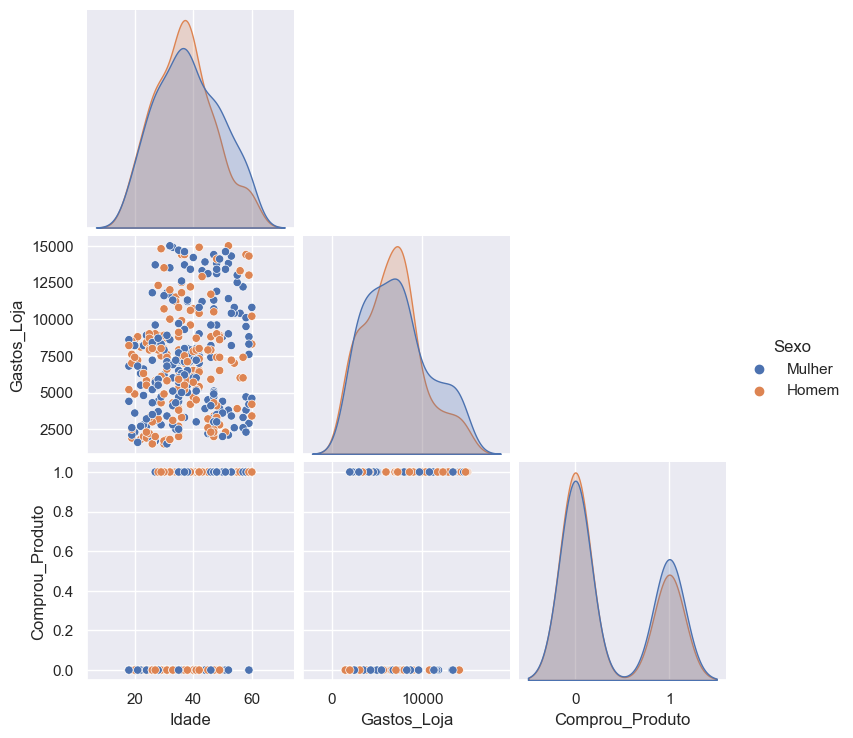

In [163]:
# Gráfico para checar co-linearidade entre variáveis (colorido por gênero)
sns.pairplot(df, hue='Sexo', corner=True);

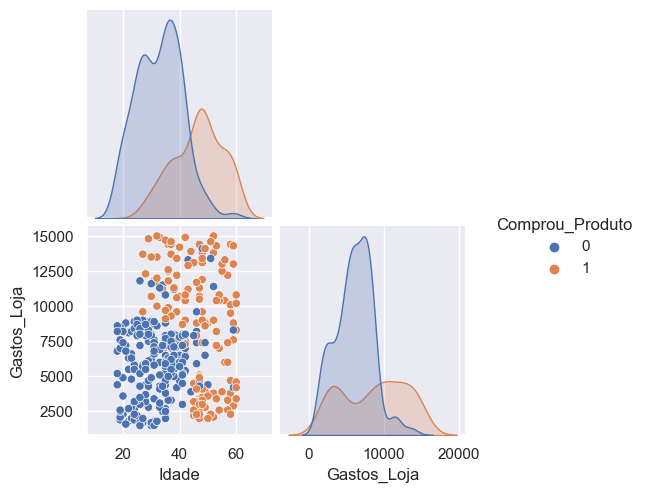

In [164]:
# Gráfico para checar co-linearidade entre variáveis (colorido por compra de produto)
sns.pairplot(df, hue='Comprou_Produto', corner=True);

In [165]:
# Criar função para visualizar distribuições em gráficos
def distribuicoes(coluna):
    plt.figure(figsize=(16, 10))
    plt.suptitle(f'Distribuição de {coluna} dos Clientes', fontsize=18)

    plt.subplot(2, 2, 1)
    plt.grid(False)
    sns.histplot(df[coluna]);

    plt.subplot(2, 2, 2)
    plt.grid(False)
    sns.distplot(df[coluna]);

    plt.subplot(2, 2, 3)
    plt.grid(False)
    sns.violinplot(df[coluna]);

    plt.subplot(2, 2, 4)
    plt.grid(False)
    sns.boxplot(df[coluna])

    plt.show()

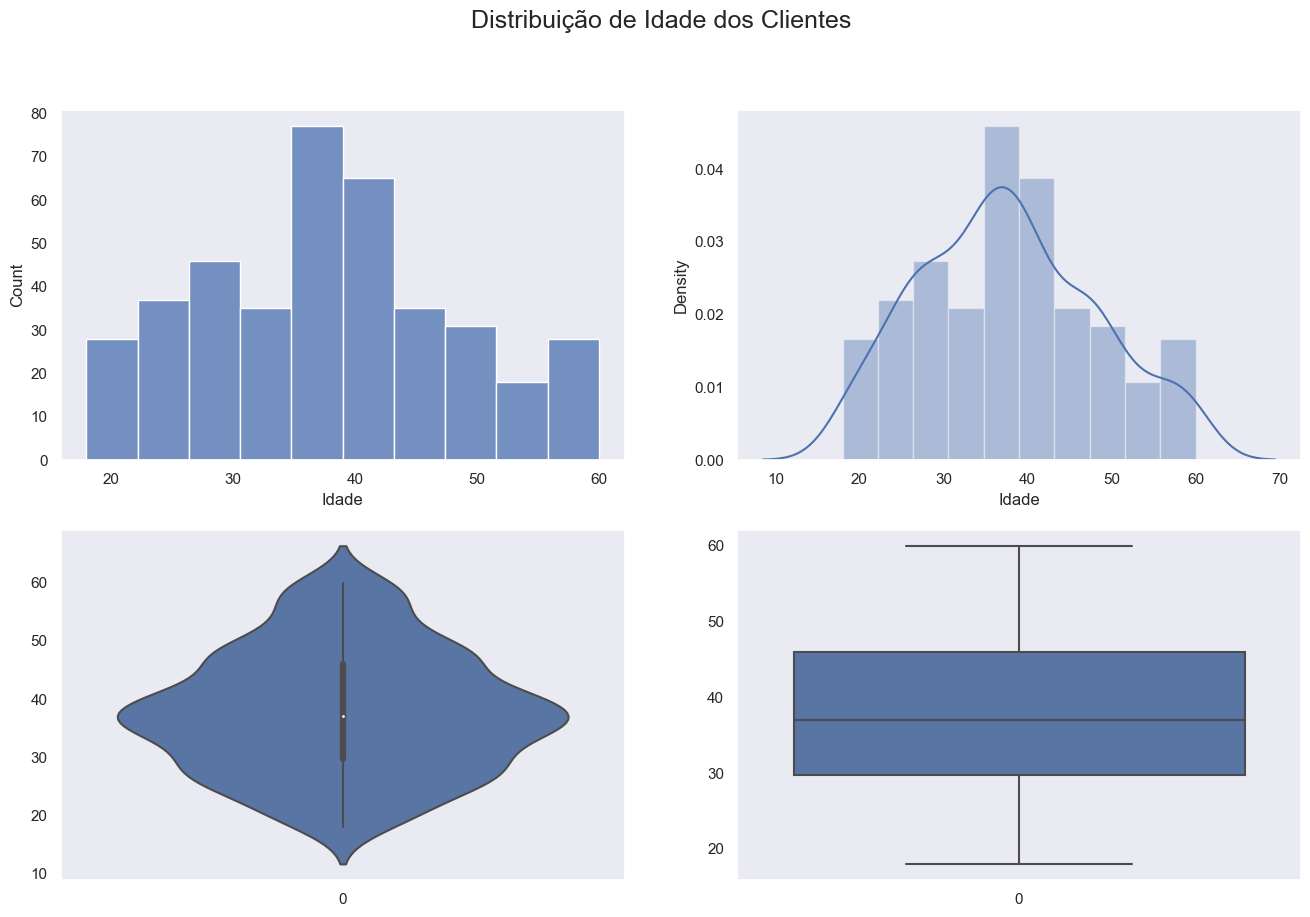

In [166]:
distribuicoes('Idade')

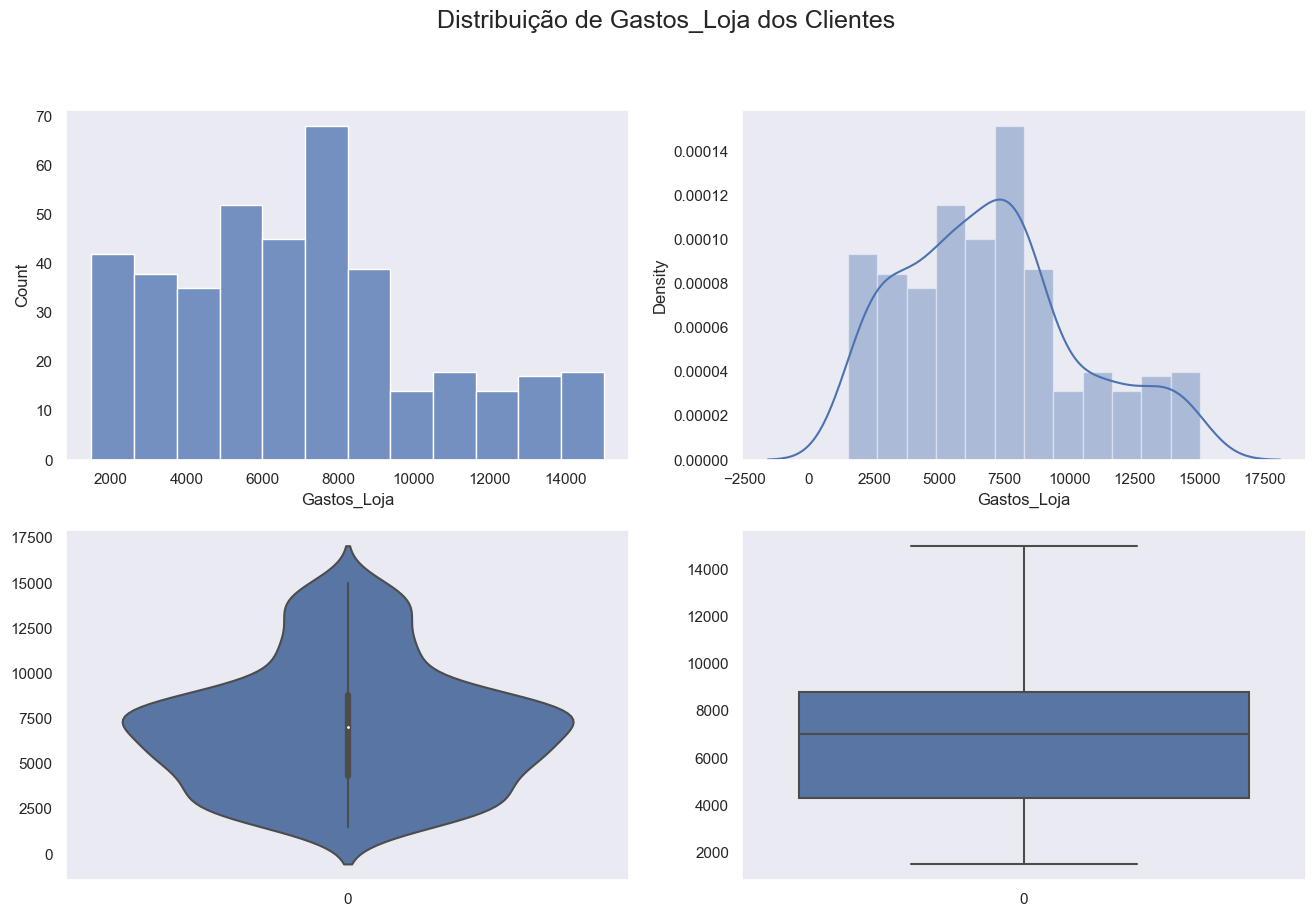

In [167]:
distribuicoes('Gastos_Loja')

In [168]:
# mais gráficos

In [169]:
# mais gráficos

In [170]:
# mais gráficos

In [171]:
# mais gráficos

In [172]:
# mais gráficos

In [173]:
# mais gráficos

In [174]:
# Criar coluna com grupo de idades (min=18 | max=60) - 5 em 5 anos
idades = []
for idade in df['Idade']:
    if idade >= 18 and idade <= 22:
        idades.append('18-22')
    elif idade >= 23 and idade <= 27:
        idades.append('23-27')
    elif idade >= 28 and idade <= 32:
        idades.append('28-32')
    elif idade >= 33 and idade <= 37:
        idades.append('33-37')
    elif idade >= 38 and idade <= 42:
        idades.append('38-42')
    elif idade >= 43 and idade <= 47:
        idades.append('43-47')
    elif idade >= 48 and idade <= 52:
        idades.append('48-52')
    elif idade >= 53 and idade <= 57:
        idades.append('53-57')
    else:
        idades.append('58+')

df['Categoria_Idade'] = idades

In [175]:
# Criar coluna com grupo de gastos (pouco [0-5K], médio [5-10K], muito[10K+])
gastos = []
for gasto in df['Gastos_Loja']:
    if gasto < 5000:
        gastos.append('Pouco')
    elif gasto >= 5000 and gasto < 10000:
        gastos.append('Médio')
    else:
        gastos.append('Muito')

df['Categoria_Gastos'] = gastos

In [176]:
# Checar novas colunas
df.tail()

,Cliente,Sexo,Idade,Gastos_Loja,Comprou_Produto,Categoria_Idade,Categoria_Gastos
395,Maysa Jesus,Mulher,35,2500.00,0,33-37,Pouco
396,Lívia da Mota,Mulher,28,5500.00,0,28-32,Médio
397,Raul Cunha,Homem,29,14800.00,1,28-32,Muito
398,Eduardo Cardoso,Homem,27,2000.00,0,23-27,Pouco
399,Sophie da Luz,Mulher,59,8300.00,0,58+,Médio


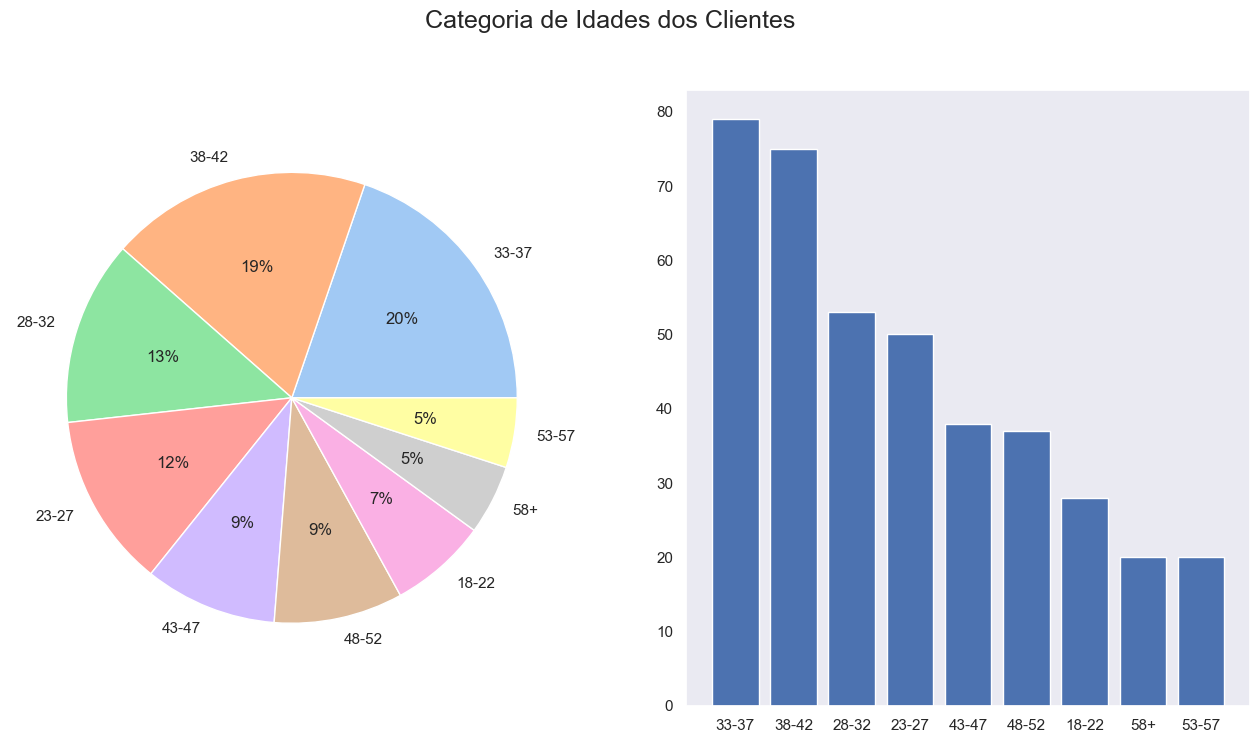

In [177]:
categorias_idades = df['Categoria_Idade'].value_counts()

plt.figure(figsize=(16, 8))
plt.suptitle(f'Categoria de Idades dos Clientes', fontsize=18)

plt.subplot(1, 2, 1)
cores = sns.color_palette('pastel')[0:9]
plt.pie(data=categorias_idades, x=categorias_idades.values, labels=categorias_idades.index, colors=cores, autopct='%.0f%%')

plt.subplot(1, 2, 2)
plt.grid(False)
plt.bar(data=categorias_idades, x=categorias_idades.index, height=categorias_idades.values)

plt.show()

In [178]:
# Agrupar dados por Categoria de Idade e retirar a média dos valores numéricos
df1 = df.groupby('Categoria_Idade').mean()[['Gastos_Loja', 'Comprou_Produto']]
df1

,Gastos_Loja,Comprou_Produto
Categoria_Idade,,
18-22,5621.43,0.00
23-27,5750.00,0.04
28-32,7373.58,0.19
33-37,7037.97,0.22
38-42,7338.67,0.23
43-47,6555.26,0.74
48-52,7675.68,0.84
53-57,8245.00,1.00
58+,7480.00,0.90


#### **OBSERVAÇÕES:** 

- Clientes Acima de 52 anos compram quase sempre o produto. 
- Clientes abaixo de 24 anos quase nunca compram o produto.

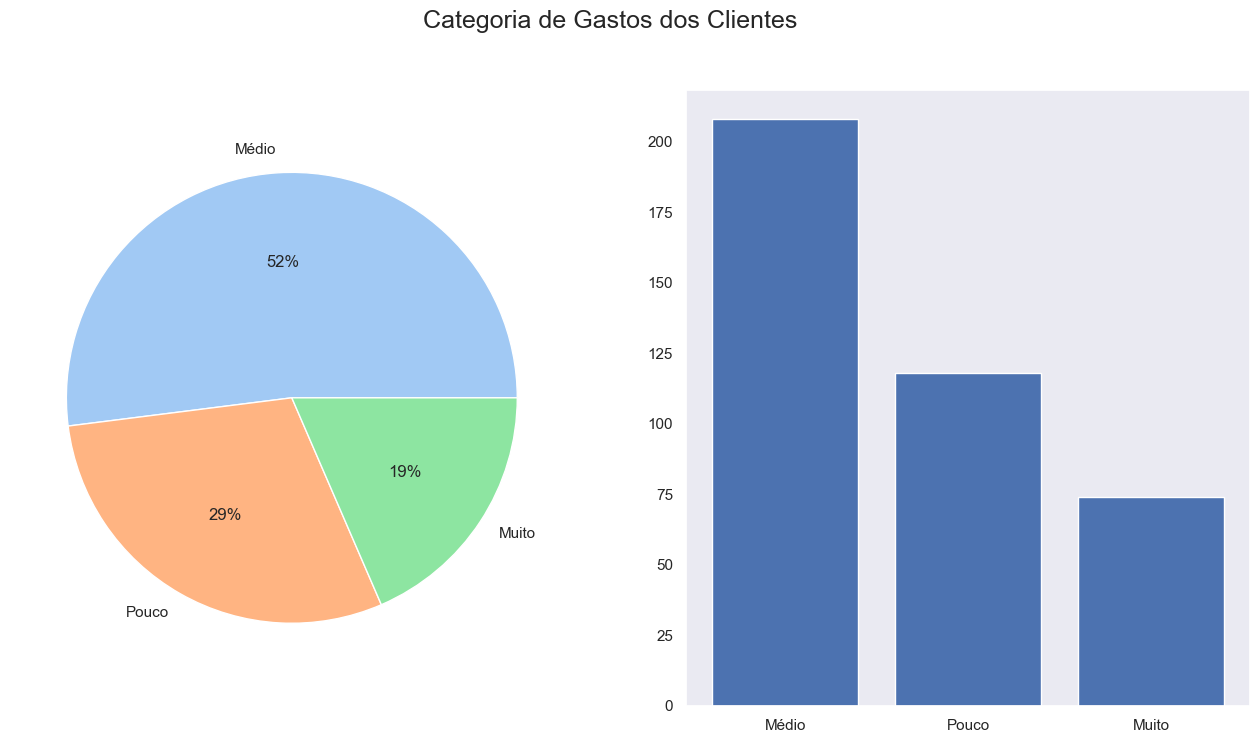

In [179]:
categorias_gastos = df['Categoria_Gastos'].value_counts()

plt.figure(figsize=(16, 8))
plt.suptitle(f'Categoria de Gastos dos Clientes', fontsize=18)

plt.subplot(1, 2, 1)
cores = sns.color_palette('pastel')[0:3]
plt.pie(data=categorias_gastos, x=categorias_gastos.values, labels=categorias_gastos.index, colors=cores, autopct='%.0f%%')

plt.subplot(1, 2, 2)
plt.grid(False)
plt.bar(data=categorias_gastos, x=categorias_gastos.index, height=categorias_gastos.values)

plt.show()

In [180]:
# Agrupar dados por Categoria de Gastos e retirar a média dos valores numéricos
df1 = df.groupby('Categoria_Gastos').mean()[['Idade', 'Gastos_Loja', 'Comprou_Produto']]
df1

,Idade,Gastos_Loja,Comprou_Produto
Categoria_Gastos,,,
Muito,42.78,12531.08,0.85
Médio,35.73,7168.27,0.18
Pouco,37.83,3147.46,0.36


In [181]:
df.head()

,Cliente,Sexo,Idade,Gastos_Loja,Comprou_Produto,Categoria_Idade,Categoria_Gastos
0,Srta. Clarice Souza,Mulher,47,5100.00,1,43-47,Médio
1,Enzo Pires,Homem,27,8800.00,0,23-27,Médio
2,Sra. Rafaela Farias,Mulher,41,7100.00,0,38-42,Médio
3,Ana Laura Fernandes,Mulher,59,7600.00,1,58+,Médio
4,Nina Pereira,Mulher,57,12200.00,1,53-57,Muito


#### Quais os clientes que mais gastam na loja? (Top-10)

In [182]:
df.sort_values(by='Gastos_Loja', ascending=False, ignore_index=True).head(10)

,Cliente,Sexo,Idade,Gastos_Loja,Comprou_Produto,Categoria_Idade,Categoria_Gastos
0,Melissa da Mata,Mulher,32,15000.00,1,28-32,Muito
1,Sr. João Felipe da Mata,Homem,52,15000.00,1,48-52,Muito
2,Murilo Cavalcanti,Homem,42,14900.00,1,38-42,Muito
3,Olivia Peixoto,Mulher,33,14900.00,1,33-37,Muito
4,Raul Cunha,Homem,29,14800.00,1,28-32,Muito
5,Marcela Martins,Mulher,35,14700.00,1,33-37,Muito
6,Valentina Mendes,Mulher,51,14600.00,1,48-52,Muito
7,Dra. Beatriz Pereira,Mulher,37,14600.00,1,33-37,Muito
8,Isis Fernandes,Mulher,47,14400.00,1,43-47,Muito
9,Ryan Melo,Homem,37,14400.00,1,33-37,Muito


#### Qual a distribuição de gênero dos clientes que compraram o produto?

In [183]:
df1 = df.loc[df['Comprou_Produto'] == 1]
display(df1['Sexo'].value_counts())
print('\n')
display(df1['Sexo'].value_counts(normalize=True))

Mulher    77
Homem     66
Name: Sexo, dtype: int64

Mulher   0.54
Homem    0.46
Name: Sexo, dtype: float64

#### Qual a média de idade dos clientes que mais gastam na loja? (Top-10)

In [184]:
top10 = df.sort_values(by='Gastos_Loja', ascending=False, ignore_index=True).head(10)
top10 = top10['Idade'].mean()
print(f'A média de idade dos clientes que mais gastam na loja (top-10) é de: {top10} anos.')

A média de idade dos clientes que mais gastam na loja (top-10) é de: 39.5 anos.


#### Quais os clientes que NÃO compraram o produto e que provavelmente vão comprar?

In [185]:
df0 = df.loc[(df['Comprou_Produto'] == 0) & (df['Idade'] >= 38) & (df['Categoria_Gastos'] == 'Muito')]
df0['Cliente']

70          Lívia Souza
132      Sarah Caldeira
233    Dr. Rafael Pires
241     Ana Clara Moura
377        Maitê Farias
Name: Cliente, dtype: object

#### Quais os clientes que NÃO compraram o produto mas podem se interessar?

In [186]:
df0 = df.loc[(df['Comprou_Produto'] == 0) & (df['Idade'] >= 40) & (df['Categoria_Gastos'] != 'Muito')]
df0[['Cliente', 'Gastos_Loja']].sort_values(by='Gastos_Loja', ascending=False).drop('Gastos_Loja', axis=1)

,Cliente
391,Maysa Pereira
399,Sophie da Luz
37,Srta. Bianca Nogueira
387,Dr. Arthur Moura
200,Agatha Correia
321,Antônio Oliveira
385,Antônio Gonçalves
229,Sra. Catarina da Mota
297,André da Cruz
168,Alexia Duarte


In [187]:
df.drop('Cliente', axis=1, inplace=True)

In [188]:
df['Sexo'] = df['Sexo'].map({'Mulher': 0, 'Homem': 1})

In [189]:
df['Categoria_Idade'].unique()

df['Categoria_Idade'] = df['Categoria_Idade'].map(
    {'18-22': 1, '23-27': 2, '28-32': 3, '33-37': 4, '38-42': 5, 
     '43-47': 6, '48-52': 7, '53-57': 8, '58+': 9}
)

In [190]:
df['Categoria_Gastos'] = df['Categoria_Gastos'].map({'Pouco': 1, 'Médio': 2, 'Muito': 3})

In [191]:
df.head(3)

,Sexo,Idade,Gastos_Loja,Comprou_Produto,Categoria_Idade,Categoria_Gastos
0,0,47,5100.00,1,6,2
1,1,27,8800.00,0,2,2
2,0,41,7100.00,0,5,2


In [192]:
from sklearn.model_selection import train_test_split

X = df.drop('Comprou_Produto', axis=1)
y = df['Comprou_Produto']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((300, 5), (100, 5), (300,), (100,))

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [194]:
lr.fit(X_train, y_train)
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier()

In [195]:
lr_pred = lr.predict(X_test)
tree_pred = tree.predict(X_test)
rf_pred = rf.predict(X_test)

In [196]:
from sklearn.metrics import accuracy_score

lr_acc = accuracy_score(y_test, lr_pred)
tree_acc = accuracy_score(y_test, tree_pred)
rf_acc = accuracy_score(y_test, rf_pred)

print('*** ACURÁCIA DOS MODELOS ***')
print(f'Regressão Logística:  {lr_acc:.4f}')
print(f'Árvore de Decisão:    {tree_acc:.4f}')
print(f'Florestas Aleatórias: {rf_acc:.4f}')

*** ACURÁCIA DOS MODELOS ***
Regressão Logística:  0.8700
Árvore de Decisão:    0.8300
Florestas Aleatórias: 0.8800


#### O melhor algoritmo é **Florestas Aleatórias** com **88%** de acurácia.

In [197]:
df_pred = pd.DataFrame()
df_pred['Valor Real'] = y_test
df_pred['Previsão'] = rf_pred

In [198]:
df_pred.head(25)

,Valor Real,Previsão
398,0,0
125,0,0
328,1,1
339,0,0
172,1,0
342,1,1
197,1,1
291,1,1
29,0,0
284,1,1


In [199]:
X_train[0:2]

,Sexo,Idade,Gastos_Loja,Categoria_Idade,Categoria_Gastos
82,1,30,8900.00,3,2
367,1,41,7200.00,5,2


#### **Prever se um novo cliente irá comprar o produto**

- Sexo: Homem
- Idade: 22 anos
- Gastos: 4000

In [202]:
pred = rf.predict([[1, 22, 4000, 1, 1]])
pred = pred[0]
if pred == 0:
    print(f'O cliente NÃO irá comprar o produto.')
else:
    print(f'O cliente COMPRARÁ o produto!!!')

O cliente NÃO irá comprar o produto.


#### **Prever se um novo cliente irá comprar o produto**

- Sexo: Mulher
- Idade: 44 anos
- Gastos: 2700

In [205]:
pred = rf.predict([[0, 44, 2700, 6, 1]])
pred = pred[0]
if pred == 0:
    print(f'O cliente NÃO irá comprar o produto.')
else:
    print(f'O cliente COMPRARÁ o produto!!!')

O cliente COMPRARÁ o produto!!!


------------------------------------------------------------------

In [211]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [214]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(32, input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=1)

Epoch 1/5
300/300 [==============================] - 1s 1ms/step - loss: 0.5750 - accuracy: 0.7300 - val_loss: 0.4469 - val_accuracy: 0.8700
Epoch 2/5
300/300 [==============================] - 0s 907us/step - loss: 0.3787 - accuracy: 0.8800 - val_loss: 0.3462 - val_accuracy: 0.8800
Epoch 3/5
300/300 [==============================] - 0s 932us/step - loss: 0.3244 - accuracy: 0.8833 - val_loss: 0.3064 - val_accuracy: 0.9200
Epoch 4/5
300/300 [==============================] - 0s 940us/step - loss: 0.2991 - accuracy: 0.8967 - val_loss: 0.2854 - val_accuracy: 0.9100
Epoch 5/5
300/300 [==============================] - 0s 915us/step - loss: 0.2840 - accuracy: 0.9000 - val_loss: 0.2720 - val_accuracy: 0.9100


In [217]:
model = Sequential()
model.add(Dense(512, input_dim = X_train.shape[1],activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 1s 1ms/step - loss: 0.4071 - accuracy: 0.8433 - val_loss: 0.2935 - val_accuracy: 0.9000
Epoch 2/10
300/300 [==============================] - 0s 941us/step - loss: 0.3001 - accuracy: 0.8967 - val_loss: 0.2783 - val_accuracy: 0.9100
Epoch 3/10
300/300 [==============================] - 0s 915us/step - loss: 0.2775 - accuracy: 0.8967 - val_loss: 0.2554 - val_accuracy: 0.9000
Epoch 4/10
300/300 [==============================] - 0s 935us/step - loss: 0.2675 - accuracy: 0.8767 - val_loss: 0.2672 - val_accuracy: 0.9100
Epoch 5/10
300/300 [==============================] - 0s 912us/step - loss: 0.2587 - accuracy: 0.8967 - val_loss: 0.2563 - val_accuracy: 0.9200
Epoch 6/10
300/300 [==============================] - 0s 938us/step - loss: 0.2559 - accuracy: 0.8933 - val_loss: 0.2473 - val_accuracy: 0.9200
Epoch 7/10
300/300 [==============================] - 0s 921us/step - loss: 0.2594 - accuracy: 0.9000 - val_loss: 0.2440 - val_accuracy: 0

In [222]:
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Dense(128, input_dim = X_train.shape[1],activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=1)

Epoch 1/10
300/300 [==============================] - 1s 1ms/step - loss: 0.3877 - accuracy: 0.8533 - val_loss: 0.2699 - val_accuracy: 0.9200
Epoch 2/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2751 - accuracy: 0.8967 - val_loss: 0.2339 - val_accuracy: 0.9300
Epoch 3/10
300/300 [==============================] - 0s 999us/step - loss: 0.2723 - accuracy: 0.9000 - val_loss: 0.2576 - val_accuracy: 0.9100
Epoch 4/10
300/300 [==============================] - 0s 999us/step - loss: 0.2507 - accuracy: 0.9067 - val_loss: 0.2554 - val_accuracy: 0.9100
Epoch 5/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2586 - accuracy: 0.9133 - val_loss: 0.2504 - val_accuracy: 0.9100
Epoch 6/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2624 - accuracy: 0.9000 - val_loss: 0.2613 - val_accuracy: 0.9100
Epoch 7/10
300/300 [==============================] - 0s 1ms/step - loss: 0.2438 - accuracy: 0.9067 - val_loss: 0.2301 - val_accuracy: 0.9400
Ep

In [225]:
model = Sequential()
model.add(Dense(256, input_dim = X_train.shape[1],activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=1)

resultado = model.evaluate(X_test, y_test)
for i in range(len(model.metrics_names)):
    print('Métrica: ', model.metrics_names[i], ':', str(round(resultado[i], 2)))

Epoch 1/25
300/300 [==============================] - 1s 1ms/step - loss: 0.4995 - accuracy: 0.8033 - val_loss: 0.3649 - val_accuracy: 0.8900
Epoch 2/25
300/300 [==============================] - 0s 1ms/step - loss: 0.3215 - accuracy: 0.8867 - val_loss: 0.2856 - val_accuracy: 0.9100
Epoch 3/25
300/300 [==============================] - 0s 1ms/step - loss: 0.2791 - accuracy: 0.8900 - val_loss: 0.2607 - val_accuracy: 0.9200
Epoch 4/25
300/300 [==============================] - 0s 1ms/step - loss: 0.2625 - accuracy: 0.9000 - val_loss: 0.2444 - val_accuracy: 0.9100
Epoch 5/25
300/300 [==============================] - 0s 1ms/step - loss: 0.2545 - accuracy: 0.9033 - val_loss: 0.2409 - val_accuracy: 0.9200
Epoch 6/25
300/300 [==============================] - 0s 1ms/step - loss: 0.2495 - accuracy: 0.9100 - val_loss: 0.2357 - val_accuracy: 0.9200
Epoch 7/25
300/300 [==============================] - 0s 1ms/step - loss: 0.2389 - accuracy: 0.9067 - val_loss: 0.2440 - val_accuracy: 0.9100
Epoch 

#### A acurácia da **Rede Neural Artificial Profunda** (256 neurônios + 2 camadas) atingiu **92%**.